<a href="https://colab.research.google.com/github/michellenivar/correlation_one/blob/main/Benn_Koleske_Mukherjee_Nivar_Lab_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Make a copy of this notebook before you start.

File >> Save a Copy in Drive

Record your names:
>> Ashley Croker–Benn, Emily Koleske, Sohini Mukherjee, Michelle Nivar


In [1]:
## RUN THIS CELL to import 'numpy'

import numpy as np

## Run the cell below to load `mycurvefit()`. 

Don't worry about the code inside the black box! You just need to know how to *call* it (what inputs to give the box) and what outputs it will return!

## Curve Fitting Black Box
The code cell below contains the `mycurvefit` function that you were given in lab.

`fitparam, fiterr = mycurvefit(model_function, x_data, y_data, y_errors)`




In [2]:
#Just RUN the code in this cell and jump down to "Activity 3"
#You can also hide this section (after running this cell) by clickling the triangle symbol next to "Run the cell below"
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.io import loadmat
from google.colab import files

def round_sig(x, sig=2):
  if np.isinf(x):
    return x
  else:
    return round(x, sig-int(np.floor(np.log10(np.abs(x))))-1)

def mycurvefit(func,XX,YY,UNCERT,xlabel=None,ylabel=None,p0=None):
    '''
    Fits data (XX, YY, UNCERT) to function using scipy.curvefit, and then plots data and best fit
        Parameters
    ----------
    func : user-defined function
            Model to be used to fit data
                
    XX : numpy array
            1D vector of data's independent variable
    
    YY : numpy array 
            1D vector of data's dependent variable
            
    UNCERT : numpy array
            1D vector of uncertainty in YY
            
    xlabel: string
            label for plot's x-axis
            
    ylabel : string
            label for plot's y-axis
    
    Returns
    -------
    fitparams : numpy array
           1D array of best fit values of parameters
       
    fiterrs : numpy array
            1D array of errors on best fit parameters (taken from sqrt of diag of covariance matrix)
    
    fig : figure handle
    
    ax : axes handle
    
    '''
    

    def chisquare(data,model,uncertainty):
        '''
        Calculates value of chi squared for model given data and unvertainty
        
        Parameters
        ----------
        data : numpy array
                1D vector of data values
                    
        model : numpy array
                1D vector of values predicted by model
        
        uncertainty : numpy array
                1D vector of uncertainty corresponding to data
        
        Returns
        -------
        x2 : float
          Returns value of chi squared for this model given data and uncertainty
        '''

        x2 = np.sum((data-model)**2/uncertainty**2)
        
        return x2

    ##################################################
    #                Do the curve fit                #
    ##################################################     
    
    
    # To get curve_fit to use UNCERT, set absolute_sigma = True.  Otherwise sigma = 1
    fitparams,pcov = curve_fit(func,XX,YY,sigma = UNCERT,absolute_sigma=True, p0=p0)

    # Find error in each parameter.  Assumes covariance matrix is roughly diagonal.
    fiterrs = np.sqrt(np.diag(pcov))

    # print out the parameters and errors on them 
    print('Best Fit Parameters:\n')
    i = 0
    for A,sigA in zip(fitparams, fiterrs):
        i = i + 1
        mystring = '\t P' + str(i) + ' = '
        round_prec = np.floor(np.log10(sigA))
        if np.isinf(round_prec):
          round_prec = 3
        else:
          round_prec = -int(round_prec)

        print(mystring,round(A,round_prec),'+/-',round_sig(sigA,1))
        
    
    
    ##################################################
    #                Begin Plotting                  #
    ##################################################
    
    fig,ax = plt.subplots()
    # plot the raw data
    ax.errorbar(XX,YY,UNCERT,fmt='.',label='data',zorder=0)
    
    
    # plot the fit
    XX_shade = np.linspace(min(XX),max(XX),100)
    ax.plot(XX_shade,func(XX_shade,*fitparams),label = 'best fit',zorder=1)
    
    if xlabel == None:
      xlabel = ''
    if ylabel == None:
      ylabel = ''

    # make the plot nice
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.legend()
    
    
    
    ##################################################
    #    Calculate and display the fit metrics       #
    ##################################################
    
    # calculate the number of degrees of freedom
    shape = np.shape(XX)
    dof = shape[0] - len(fitparams)
    
    print('\n Fit Metrics:\n')
    print('\t Degrees of freedom (N-d): ', dof)
    
    X2 = chisquare(YY,func(XX,*fitparams),UNCERT)
    #X2string = '\t Chi Squared = ' + str(round(X2,1))
    X2redstring = '\t Reduced Chi Squared = '+ str(round_sig(X2/dof,4))
    #print(X2string)
    print(X2redstring)

    
    return fitparams,fiterrs

# Activity 3

Record your measurements of the resistance of the wire for different lengths. Choose up to 5 lengths.

Hint: remember units!

In [3]:
#Record your measurements here!

resistance = np.array([0.5,0.6,0.7,0.8,0.9,1.0]) #Ohms
length = np.array([0.1,0.15,0.2,0.25,0.3,0.35]) #m

Remember! All measurements need error. What error value would you assign to your resistance values, read from the multimeter?

>> Our resistance values have error that we must factor in because the voltmeter measured our resistance at 200 ohms, with a certainty to the tenth decimal place. Our error then, must be in the hundredths place.

Record that value below.
+/- 0.01

In [4]:
multimeter_error = 0.01 #Ohms

#Here we take the single-value reported for the error and
#create an array the same size as 'resistance'

resistance_error = np.ones(len(resistance))*multimeter_error #Ohms

How are the resistance and length of the wire related?

>> The resistance and length of the wire are directly related.

Write a model for the *resistance* as a function of length:

>> 

Are there any values we must calculate? Can we calculate them? 

>> answer

Now convert that model into a code function below: 

In [13]:
def resistance_model(L, P1,P2):

  #write your model below

  R = P1*L + P2

  return R

Now that we have a model we can do the fitting!

We've defined a curve fitting function for you, called `mycurvefit`. To use it, input the `modelname`, `xdata`, `ydata`, and `yerror`. 


E.g. replace `modelname` with `resistance_model` below.

What are our `xdata` and `ydata`? 

What about the `error`?




Best Fit Parameters:

	 P1 =  2.0 +/- 0.05
	 P2 =  0.3 +/- 0.01

 Fit Metrics:

	 Degrees of freedom (N-d):  4
	 Reduced Chi Squared = 3.0810000000000006e-29


(array([2. , 0.3]), array([0.04780915, 0.01150569]))

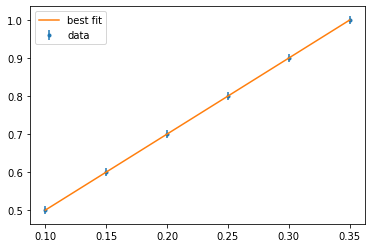

In [14]:
mycurvefit(resistance_model, length, resistance, resistance_error)

Does the fit look good? If not, call over a TF.

What does `P1` and `P2` refer to? Talk to a TF if you're unsure. 

>> P1 refers to resistivity divided by the area of the wire. P2 refers to internal resistance of the voltmeter.

What is the fit value of the resistivity of the wire?

>> The fit value of the resistivity of the wire is 1 x 10^(-6) ohms times meters.

Now return to the Google doc to determine the wire material!
